Imports

In [1]:
from pathlib import Path
import importlib
from collections import defaultdict
import time
import pickle

import numpy as np
import pandas as pd
import scipy
from scipy.stats import pearsonr

import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

import pyBigWig
import pysam

from Modules import utils, plot_utils

Global variables

In [2]:
importlib.reload(utils)
importlib.reload(plot_utils)
data_dir = '../shared_folder'
writing_dir = '../shared_folder'
# writing_dir='../'
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
# plt.rcParams.update({'axes.labelsize': 16})
# sns.set()

In [3]:
TOTALS = {}
def load_CPM(filename):
    bw = utils.load_bw(filename)
    tot = sum(np.sum(arr) for arr in bw.values())
    global TOTALS
    TOTALS[filename] = tot
    return {k: v * 1e6 / tot for k, v in bw.items()}

In [4]:
mnase2020_167 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_167_1_lib406963_6879_2_trimfiltered_max250.bw')
mnase2020_197a = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_1971_1_lib402285_6844_1_trimfiltered_max250.bw')
mnase2020_197b = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_1972_1_lib402286_6844_1_trimfiltered_max250.bw')
mnase2020_237_1 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_237_1_lib406964_6888_1_trimfiltered_max250.bw')
mnase2020_237_2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_237_1_lib406964_6879_2_trimfiltered_max250.bw')

mnase2022_237sansD_1 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237_1_lib554809_7856_3_trimfiltered_max250.bw')
mnase2022_237sansD_2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237_2_lib554810_7856_3_trimfiltered_max250.bw')
mnase2022_237D10_1 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D10_1_lib554811_7856_3_trimfiltered_max250.bw')
mnase2022_237D10_2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D10_2_lib554812_7856_3_trimfiltered_max250.bw')
mnase2022_237D50_1 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D50_1_lib554813_7856_3_trimfiltered_max250.bw')
mnase2022_237D50_2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D50_2_lib554814_7856_3_trimfiltered_max250.bw')

mnase2023_167_1 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_167_4_1_lib713576_10294_1_trimfiltered_max250.bw')
mnase2023_167_2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_167_4_2_lib713577_10294_1_trimfiltered_max250.bw')
mnase2023_197a_1 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_1_22_1_lib713578_10294_1_trimfiltered_max250.bw')
mnase2023_197a_2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_1_22_2_lib713579_10294_1_trimfiltered_max250.bw')
mnase2023_197b_1 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_2_27_1_lib713580_10294_1_trimfiltered_max250.bw')
mnase2023_197b_2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_2_27_2_lib713581_10294_1_trimfiltered_max250.bw')
mnase2023_237_1 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_237_44_1_lib713582_10294_1_trimfiltered_max250.bw')
mnase2023_237_2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_237_44_2_lib713583_10294_1_trimfiltered_max250.bw')

mnase601_167 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_601/SRR13645559_167_max250.bw')
mnase601_197 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_601/SRR13645549_197_max250.bw')
mnase601_237 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_601/SRR13645545_237_max250.bw')

rna2022_167 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29104_167_replacement_sample_lib568677_7920_2_trimfiltered_reads.bw')
rna2022_197a = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29104_197_1_lib556538_7886_1_trimfiltered_reads.bw')
rna2022_197b = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29104_197_2_lib556539_7886_1_trimfiltered_reads.bw')
rna2022_237 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29104_237_lib556540_7886_1_trimfiltered_reads.bw')
rna2022_237sansD = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29820_237sansD_lib587179_8045_2_trimfiltered_reads.bw')
rna2022_237D = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29820_237D_lib587178_8045_2_trimfiltered_reads.bw')

rna2023_167 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_08_2023/NG-34139_167_4_lib717029_10297_1_trimfiltered_reads.bw')
rna2023_197a = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_08_2023/NG-34139_197_1_22_lib717030_10297_1_trimfiltered_reads.bw')
rna2023_197b = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_08_2023/NG-34139_197_2_27_lib717031_10297_1_trimfiltered_reads.bw')
rna2023_237 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_08_2023/NG-34139_237_44_lib717032_10297_1_trimfiltered_reads.bw')

In [5]:
mnase2020_167_win = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_167_1_lib406963_6879_2_trimfiltered_max250_140-160.bw')
mnase2020_197a_win = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_1971_1_lib402285_6844_1_trimfiltered_max250_140-160.bw')
mnase2020_197b_win = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_1972_1_lib402286_6844_1_trimfiltered_max250_140-160.bw')
mnase2020_237_1_win = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_237_1_lib406964_6888_1_trimfiltered_max250_140-160.bw')
mnase2020_237_2_win = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_237_1_lib406964_6879_2_trimfiltered_max250_140-160.bw')

mnase2022_237sansD_1_win = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237_1_lib554809_7856_3_trimfiltered_max250_140-160.bw')
mnase2022_237sansD_2_win = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237_2_lib554810_7856_3_trimfiltered_max250_140-160.bw')
mnase2022_237D10_1_win = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D10_1_lib554811_7856_3_trimfiltered_max250_140-160.bw')
mnase2022_237D10_2_win = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D10_2_lib554812_7856_3_trimfiltered_max250_140-160.bw')
mnase2022_237D50_1_win = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D50_1_lib554813_7856_3_trimfiltered_max250_140-160.bw')
mnase2022_237D50_2_win = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D50_2_lib554814_7856_3_trimfiltered_max250_140-160.bw')

mnase2023_167_1_win = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_167_4_1_lib713576_10294_1_trimfiltered_max250_140-160.bw')
mnase2023_167_2_win = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_167_4_2_lib713577_10294_1_trimfiltered_max250_140-160.bw')
mnase2023_197a_1_win = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_1_22_1_lib713578_10294_1_trimfiltered_max250_140-160.bw')
mnase2023_197a_2_win = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_1_22_2_lib713579_10294_1_trimfiltered_max250_140-160.bw')
mnase2023_197b_1_win = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_2_27_1_lib713580_10294_1_trimfiltered_max250_140-160.bw')
mnase2023_197b_2_win = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_2_27_2_lib713581_10294_1_trimfiltered_max250_140-160.bw')
mnase2023_237_1_win = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_237_44_1_lib713582_10294_1_trimfiltered_max250_140-160.bw')
mnase2023_237_2_win = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_237_44_2_lib713583_10294_1_trimfiltered_max250_140-160.bw')

mnase601_167_win = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_601/SRR13645559_167_max250_140-160.bw')
mnase601_197_win = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_601/SRR13645549_197_max250_140-160.bw')
mnase601_237_win = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_601/SRR13645545_237_max250_140-160.bw')

rna2022_167_for = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29104_167_replacement_sample_lib568677_7920_2_trimfiltered_reads_for.bw')
rna2022_167_rev = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29104_167_replacement_sample_lib568677_7920_2_trimfiltered_reads_rev.bw')
rna2022_197a_for = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29104_197_1_lib556538_7886_1_trimfiltered_reads_for.bw')
rna2022_197a_rev = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29104_197_1_lib556538_7886_1_trimfiltered_reads_rev.bw')
rna2022_197b_for = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29104_197_2_lib556539_7886_1_trimfiltered_reads_for.bw')
rna2022_197b_rev = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29104_197_2_lib556539_7886_1_trimfiltered_reads_rev.bw')
rna2022_237_for = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29104_237_lib556540_7886_1_trimfiltered_reads_for.bw')
rna2022_237_rev = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29104_237_lib556540_7886_1_trimfiltered_reads_rev.bw')
rna2022_237sansD_for = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29820_237sansD_lib587179_8045_2_trimfiltered_reads_for.bw')
rna2022_237sansD_rev = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29820_237sansD_lib587179_8045_2_trimfiltered_reads_rev.bw')
rna2022_237D_for = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29820_237D_lib587178_8045_2_trimfiltered_reads_for.bw')
rna2022_237D_rev = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29820_237D_lib587178_8045_2_trimfiltered_reads_rev.bw')

rna2023_167_for = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_08_2023/NG-34139_167_4_lib717029_10297_1_trimfiltered_reads_for.bw')
rna2023_167_rev = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_08_2023/NG-34139_167_4_lib717029_10297_1_trimfiltered_reads_rev.bw')
rna2023_197a_for = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_08_2023/NG-34139_197_1_22_lib717030_10297_1_trimfiltered_reads_for.bw')
rna2023_197a_rev = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_08_2023/NG-34139_197_1_22_lib717030_10297_1_trimfiltered_reads_rev.bw')
rna2023_197b_for = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_08_2023/NG-34139_197_2_27_lib717031_10297_1_trimfiltered_reads_for.bw')
rna2023_197b_rev = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_08_2023/NG-34139_197_2_27_lib717031_10297_1_trimfiltered_reads_rev.bw')
rna2023_237_for = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_08_2023/NG-34139_237_44_lib717032_10297_1_trimfiltered_reads_for.bw')
rna2023_237_rev = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_08_2023/NG-34139_237_44_lib717032_10297_1_trimfiltered_reads_rev.bw')

In [6]:
mnase2020_167_win2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_167_1_lib406963_6879_2_trimfiltered_max250_140-170.bw')
mnase2020_197a_win2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_1971_1_lib402285_6844_1_trimfiltered_max250_140-170.bw')
mnase2020_197b_win2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_1972_1_lib402286_6844_1_trimfiltered_max250_140-170.bw')
mnase2020_237_1_win2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_237_1_lib406964_6888_1_trimfiltered_max250_140-170.bw')
mnase2020_237_2_win2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_237_1_lib406964_6879_2_trimfiltered_max250_140-170.bw')

mnase2022_237sansD_1_win2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237_1_lib554809_7856_3_trimfiltered_max250_140-170.bw')
mnase2022_237sansD_2_win2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237_2_lib554810_7856_3_trimfiltered_max250_140-170.bw')
mnase2022_237D10_1_win2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D10_1_lib554811_7856_3_trimfiltered_max250_140-170.bw')
mnase2022_237D10_2_win2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D10_2_lib554812_7856_3_trimfiltered_max250_140-170.bw')
mnase2022_237D50_1_win2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D50_1_lib554813_7856_3_trimfiltered_max250_140-170.bw')
mnase2022_237D50_2_win2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D50_2_lib554814_7856_3_trimfiltered_max250_140-170.bw')

mnase2023_167_1_win2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_167_4_1_lib713576_10294_1_trimfiltered_max250_140-170.bw')
mnase2023_167_2_win2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_167_4_2_lib713577_10294_1_trimfiltered_max250_140-170.bw')
mnase2023_197a_1_win2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_1_22_1_lib713578_10294_1_trimfiltered_max250_140-170.bw')
mnase2023_197a_2_win2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_1_22_2_lib713579_10294_1_trimfiltered_max250_140-170.bw')
mnase2023_197b_1_win2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_2_27_1_lib713580_10294_1_trimfiltered_max250_140-170.bw')
mnase2023_197b_2_win2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_2_27_2_lib713581_10294_1_trimfiltered_max250_140-170.bw')
mnase2023_237_1_win2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_237_44_1_lib713582_10294_1_trimfiltered_max250_140-170.bw')
mnase2023_237_2_win2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_237_44_2_lib713583_10294_1_trimfiltered_max250_140-170.bw')

mnase601_167_win2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_601/SRR13645559_167_max250_140-170.bw')
mnase601_197_win2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_601/SRR13645549_197_max250_140-170.bw')
mnase601_237_win2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_601/SRR13645545_237_max250_140-170.bw')

In [4]:
mnase2020_167_win3 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_167_1_lib406963_6879_2_trimfiltered_max250_140-170_CPM.bw')
mnase2020_197a_win3 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_1971_1_lib402285_6844_1_trimfiltered_max250_140-170_CPM.bw')
mnase2020_197b_win3 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_1972_1_lib402286_6844_1_trimfiltered_max250_140-170_CPM.bw')
mnase2020_237_1_win3 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_237_1_lib406964_6888_1_trimfiltered_max250_140-170_CPM.bw')
mnase2020_237_2_win3 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_237_1_lib406964_6879_2_trimfiltered_max250_140-170_CPM.bw')

mnase2022_237sansD_1_win3 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237_1_lib554809_7856_3_trimfiltered_max250_140-170_CPM.bw')
mnase2022_237sansD_2_win3 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237_2_lib554810_7856_3_trimfiltered_max250_140-170_CPM.bw')
mnase2022_237D10_1_win3 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D10_1_lib554811_7856_3_trimfiltered_max250_140-170_CPM.bw')
mnase2022_237D10_2_win3 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D10_2_lib554812_7856_3_trimfiltered_max250_140-170_CPM.bw')
mnase2022_237D50_1_win3 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D50_1_lib554813_7856_3_trimfiltered_max250_140-170_CPM.bw')
mnase2022_237D50_2_win3 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D50_2_lib554814_7856_3_trimfiltered_max250_140-170_CPM.bw')

mnase2023_167_1_win3 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_167_4_1_lib713576_10294_1_trimfiltered_max250_140-170_CPM.bw')
mnase2023_167_2_win3 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_167_4_2_lib713577_10294_1_trimfiltered_max250_140-170_CPM.bw')
mnase2023_197a_1_win3 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_1_22_1_lib713578_10294_1_trimfiltered_max250_140-170_CPM.bw')
mnase2023_197a_2_win3 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_1_22_2_lib713579_10294_1_trimfiltered_max250_140-170_CPM.bw')
mnase2023_197b_1_win3 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_2_27_1_lib713580_10294_1_trimfiltered_max250_140-170_CPM.bw')
mnase2023_197b_2_win3 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_2_27_2_lib713581_10294_1_trimfiltered_max250_140-170_CPM.bw')
mnase2023_237_1_win3 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_237_44_1_lib713582_10294_1_trimfiltered_max250_140-170_CPM.bw')
mnase2023_237_2_win3 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_237_44_2_lib713583_10294_1_trimfiltered_max250_140-170_CPM.bw')

mnase601_167_win3 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_601/SRR13645559_167_max250_140-170_CPM.bw')
mnase601_197_win3 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_601/SRR13645549_197_max250_140-170_CPM.bw')
mnase601_237_win3 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_601/SRR13645545_237_max250_140-170_CPM.bw')

In [15]:
import re
r2020 = re.compile('[\S]*(167|1971|1972|237)[\S]*(.)(_trimfiltered[\S]*)$')
r2022 = re.compile('[\S]*(237[^_]*)_(.)[\S]*(_trimfiltered[\S]*)$')
r2023 = re.compile('[\S]*(167|197_1|197_2|237)_[^_]*_(.)[\S]*(_trimfiltered[\S]*)$')
rrna = re.compile('[\S]*(167|197_1|197_2|237[^_]*)[\S]*(_trimfiltered[\S]*)$')
r601 = re.compile('[\S]*(167|197|237)[\S]*(_max250[\S]*)$')
re_dict = {'MNases_06_2020': r2020,
           'MNase_03_2022': r2022,
           'MNase_08_2023': r2023,
           'RNAseq_03_2022': rrna,
           'RNAseq_08_2023': rrna,
           'MNase_601': r601}
# m = re.search(rrna, 'NG-29820_237sansD_lib587179_8045_2_paired')
# m.groups()

In [16]:
cov_dict = defaultdict(lambda: defaultdict(dict))
for filename, total in TOTALS.items():
    f = Path(filename)
    dirname = f.parent.name
    r = re_dict[dirname]
    grps = re.search(r, f.stem).groups()
    if dirname[:3] == 'RNA' or dirname == 'MNase_601':
        rid, suffix = grps
    else:
        rid, repl, suffix = grps
        rid = rid + '_' + repl
    if suffix.endswith('_max250_140-160'):
        suffix = 'v3_140-160'
    elif suffix.endswith('_max250_140-170'):
        suffix = 'v3_140-170'
    elif suffix.endswith('_for'):
        suffix = 'v3_for'
    elif suffix.endswith('_rev'):
        suffix = 'v3_rev'
    else:
        suffix = 'v3'
    cov_dict[dirname][rid][suffix] = int(total)
cov_dict

defaultdict(<function __main__.<lambda>()>,
            {'MNases_06_2020': defaultdict(dict,
                         {'167_2': {'v3': 3856948799,
                           'v3_140-160': 1012425067,
                           'v3_140-170': 1511082037},
                          '1971_1': {'v3': 5357863882,
                           'v3_140-160': 2250546318,
                           'v3_140-170': 3366227014},
                          '1972_1': {'v3': 5544761238,
                           'v3_140-160': 1594163132,
                           'v3_140-170': 2787284301},
                          '237_1': {'v3': 81164092,
                           'v3_140-160': 19846960,
                           'v3_140-170': 28439351},
                          '237_2': {'v3': 2816495438,
                           'v3_140-160': 668916893,
                           'v3_140-170': 963350051}}),
             'MNase_03_2022': defaultdict(dict,
                         {'237_1': {'v3': 3475413823,
    

In [17]:
print(list(cov_dict.keys()))

['MNases_06_2020', 'MNase_03_2022', 'MNase_08_2023', 'MNase_601', 'RNAseq_03_2022', 'RNAseq_08_2023']


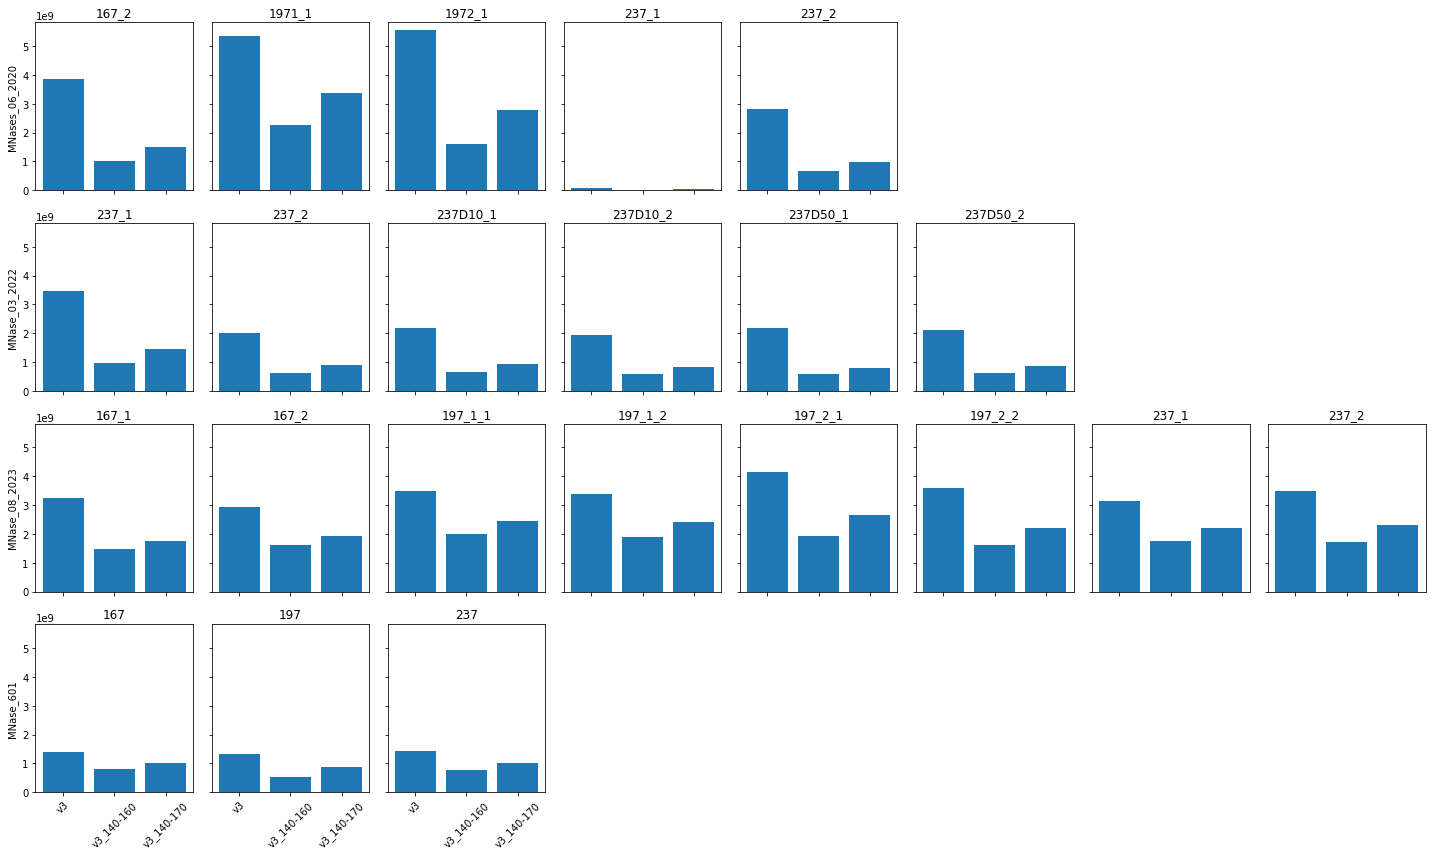

In [21]:
fig, axes = plt.subplots(4, 8, figsize=(20, 12), facecolor='w', layout='tight', sharey=True, sharex=True)
# fig, axes = plt.subplots(2, 6, figsize=(20, 7), facecolor='w', layout='tight', sharey=True, sharex=True)
for i, dirname in enumerate(cov_dict.keys()):
    if i >= 4:
        break
    # if not i >= 4:
    #     continue
    # i -= 4
    axes[i, 0].set_ylabel(dirname)
    for j, (f_key, f_cov_dict) in enumerate(cov_dict[dirname].items()):
        axes[i, j].bar(list(f_cov_dict.keys()), list(f_cov_dict.values()))
        axes[i, j].set_title(f_key)
        for tick in axes[i, j].get_xticklabels():
            tick.set_rotation(45)
    while j < axes.shape[1] - 1:
        j += 1
        axes[i, j].set_axis_off()

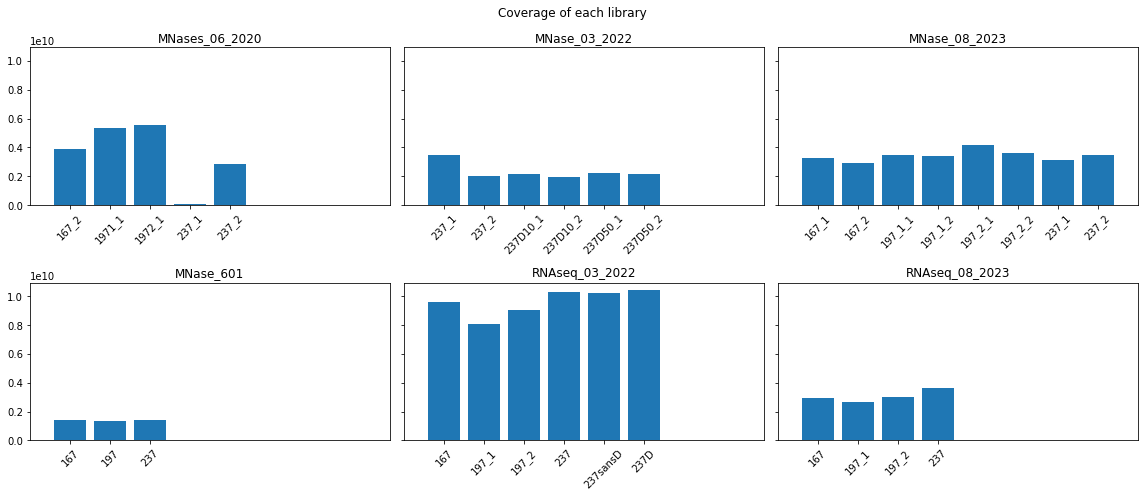

In [22]:
fig, axes = plt.subplots(2, 3, figsize=(16, 7), facecolor='w', layout='tight', sharey=True)
fig.suptitle('Coverage of each library')
for ax, dirname in zip(axes.flatten(), cov_dict.keys()):
    ax.set_title(dirname)
    ax.bar(cov_dict[dirname].keys(), [d['v3'] for d in cov_dict[dirname].values()])
    ax.set_xlim((-1, 8))
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

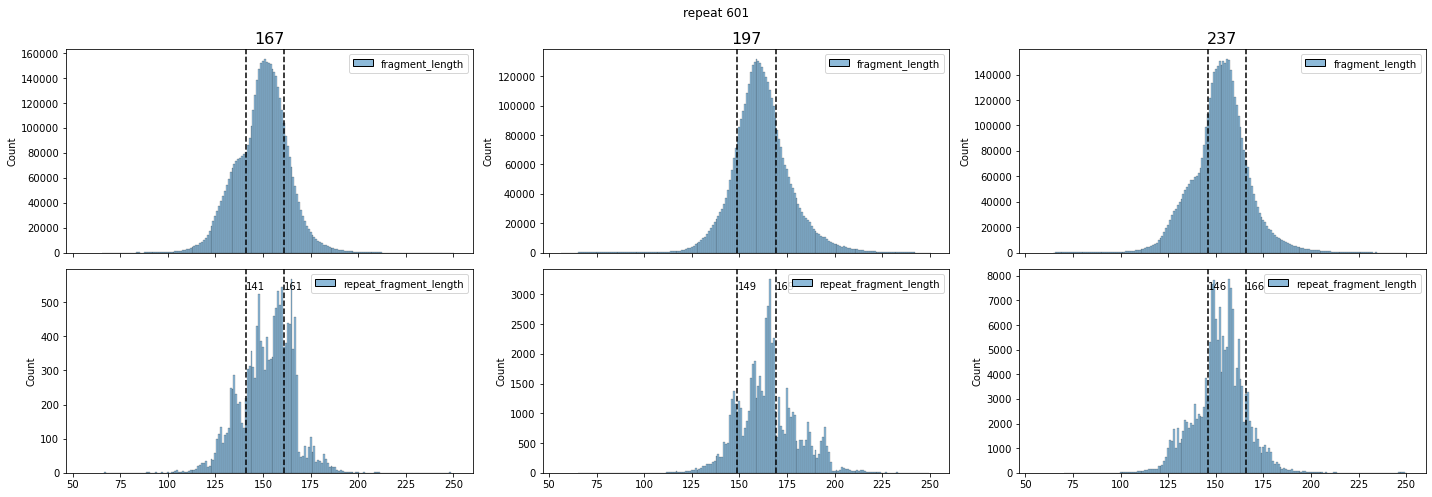

In [7]:
# file_list = ['MNase_03_2022/NG-29037_237_1_lib554809_7856_3_trimfiltered_max250',
#              'MNase_03_2022/NG-29037_237_2_lib554810_7856_3_trimfiltered_max250',
#              'MNase_03_2022/NG-29037_237D10_1_lib554811_7856_3_trimfiltered_max250',
#              'MNase_03_2022/NG-29037_237D10_2_lib554812_7856_3_trimfiltered_max250',
#              'MNase_03_2022/NG-29037_237D50_1_lib554813_7856_3_trimfiltered_max250',
#              'MNase_03_2022/NG-29037_237D50_2_lib554814_7856_3_trimfiltered_max250']
# titles = ['noD_1', 'noD_2', 'D10_1', 'D10_2', 'D50_1', 'D50_2']
# fig, axes = plt.subplots(6, 2, sharex=True, figsize=(12, 12), facecolor='w', layout='tight')
file_list = ['MNase_601/SRR13645559_167_max250',
             'MNase_601/SRR13645549_197_max250',
             'MNase_601/SRR13645545_237_max250']
titles = ['167', '197', '237']
fig, axes = plt.subplots(2, len(file_list), sharex=True, figsize=(20, 7), facecolor='w', layout='tight')
fig.suptitle('repeat 601')
offsetlines = [-10, +10] # [] #
for i, filename in enumerate(file_list):
    ix, iy = 0, i # divmod(i, 2) #
    fraglens = pd.read_csv(f'/home/alex/shared_folder/JB_seqdes/Projet_Julien/{filename}.sorted.bam.insert_sizes.txt', header=None)
    repfraglens = pd.read_csv(f'/home/alex/shared_folder/JB_seqdes/Projet_Julien/{filename}.sorted.bam.repeat_insert_sizes.txt', header=None)
    fraglens.columns = ['fragment_length']
    repfraglens.columns = ['repeat_fragment_length']
    sns.histplot(fraglens, discrete=True, ax=axes[0 + 2*ix, iy])
    g = sns.histplot(repfraglens, discrete=True, ax=axes[1 + 2*ix, iy])
    # print(np.median(fraglens))
    val, count = np.unique(fraglens, return_counts=True)
    max_val = val[np.argmax(count)]
    vlines = [max_val + v for v in offsetlines]
    for v in vlines:
        axes[0 + ix*2, iy].axvline(x=v, color='k', linestyle='--')
        axes[1 + ix*2, iy].axvline(x=v, color='k', linestyle='--')
        axes[1 + ix*2, iy].annotate(str(v), xy=(v, 0.9), xycoords=('data', 'axes fraction'))
    axes[0 + ix*2, iy].set_title(titles[i], fontsize=16)

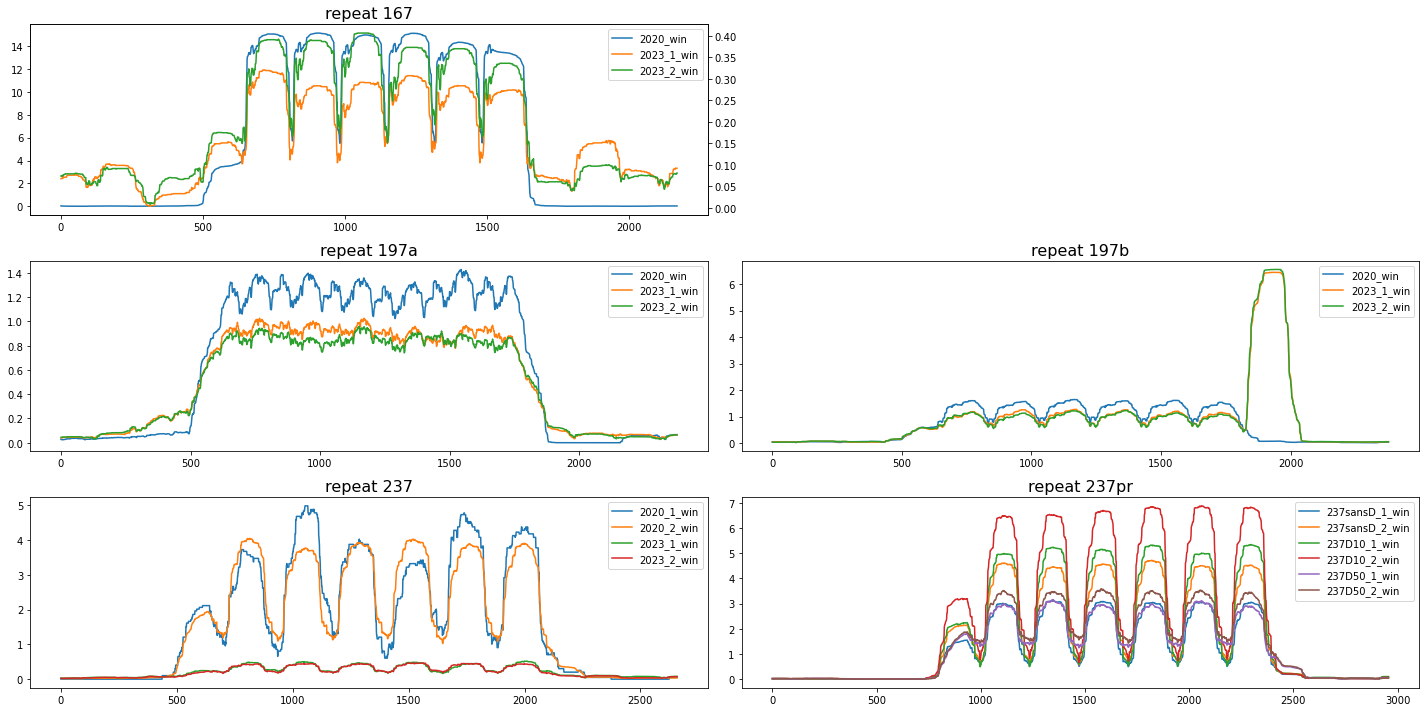

In [46]:
start = 3500
stop = -3500

fig, axes = plt.subplots(3, 2, figsize=(20, 10), facecolor='w', layout='tight')

axes[0, 0].set_title('repeat 167', fontsize=16)
col_idx = 0
axes[0, 0].plot(mnase2020_167_win['167_7_4kbrf'][start:stop], label='2020_win') ; col_idx += 1
ax0 = axes[0, 0].twinx()
ax0.plot(mnase2023_167_1_win['167_7_4kbrf'][start:stop], label='2023_1_win', color=colors[col_idx]) ; col_idx += 1
ax0.plot(mnase2023_167_2_win['167_7_4kbrf'][start:stop], label='2023_2_win', color=colors[col_idx]) ; col_idx += 1
h, l = plot_utils.add_legend([axes[0, 0], ax0])
axes[0, 0].legend(h, l)

axes[0, 1].set_axis_off()

axes[1, 0].set_title('repeat 197a', fontsize=16)
axes[1, 0].plot(mnase2020_197a_win['197a_7_4kbrf'][start:stop], label='2020_win')
axes[1, 0].plot(mnase2023_197a_1_win['197a_7_4kbrf'][start:stop], label='2023_1_win')
axes[1, 0].plot(mnase2023_197a_2_win['197a_7_4kbrf'][start:stop], label='2023_2_win')
axes[1, 0].legend()

axes[1, 1].set_title('repeat 197b', fontsize=16)
axes[1, 1].plot(mnase2020_197b_win['197b_7_4kbrf'][start:stop], label='2020_win')
axes[1, 1].plot(mnase2023_197b_1_win['197b_7_4kbrf'][start:stop], label='2023_1_win')
axes[1, 1].plot(mnase2023_197b_2_win['197b_7_4kbrf'][start:stop], label='2023_2_win')
axes[1, 1].legend()

axes[2, 0].set_title('repeat 237', fontsize=16)
axes[2, 0].plot(mnase2020_237_1_win['237_7_4kbrf'][start:stop], label='2020_1_win')
axes[2, 0].plot(mnase2020_237_2_win['237_7_4kbrf'][start:stop], label='2020_2_win')
axes[2, 0].plot(mnase2023_237_1_win['237_7_4kbrf'][start:stop], label='2023_1_win')
axes[2, 0].plot(mnase2023_237_2_win['237_7_4kbrf'][start:stop], label='2023_2_win')
axes[2, 0].legend()

axes[2, 1].set_title('repeat 237pr', fontsize=16)
axes[2, 1].plot(mnase2022_237sansD_1_win['237pr_7_4kbrf'][start:stop], label='237sansD_1_win')
axes[2, 1].plot(mnase2022_237sansD_2_win['237pr_7_4kbrf'][start:stop], label='237sansD_2_win')
axes[2, 1].plot(mnase2022_237D10_1_win['237pr_7_4kbrf'][start:stop], label='237D10_1_win')
axes[2, 1].plot(mnase2022_237D10_2_win['237pr_7_4kbrf'][start:stop], label='237D10_2_win')
axes[2, 1].plot(mnase2022_237D50_1_win['237pr_7_4kbrf'][start:stop], label='237D50_1_win')
axes[2, 1].plot(mnase2022_237D50_2_win['237pr_7_4kbrf'][start:stop], label='237D50_2_win')
axes[2, 1].legend()

/home/alex/shared_folder/JB_seqdes/results/mnase_Syn_comparereps_140-170_noedges_sameX.png exists, changing filename to /home/alex/shared_folder/JB_seqdes/results/mnase_Syn_comparereps_140-170_noedges_sameX(1).png
/home/alex/shared_folder/JB_seqdes/results/mnase_Syn_comparereps_140-170_noedges_sameX.svg exists, changing filename to /home/alex/shared_folder/JB_seqdes/results/mnase_Syn_comparereps_140-170_noedges_sameX(1).svg
/home/alex/shared_folder/JB_seqdes/results/mnase_Syn_comparereps_140-170_noedges_sameX.pickle exists, changing filename to /home/alex/shared_folder/JB_seqdes/results/mnase_Syn_comparereps_140-170_noedges_sameX(1).pickle


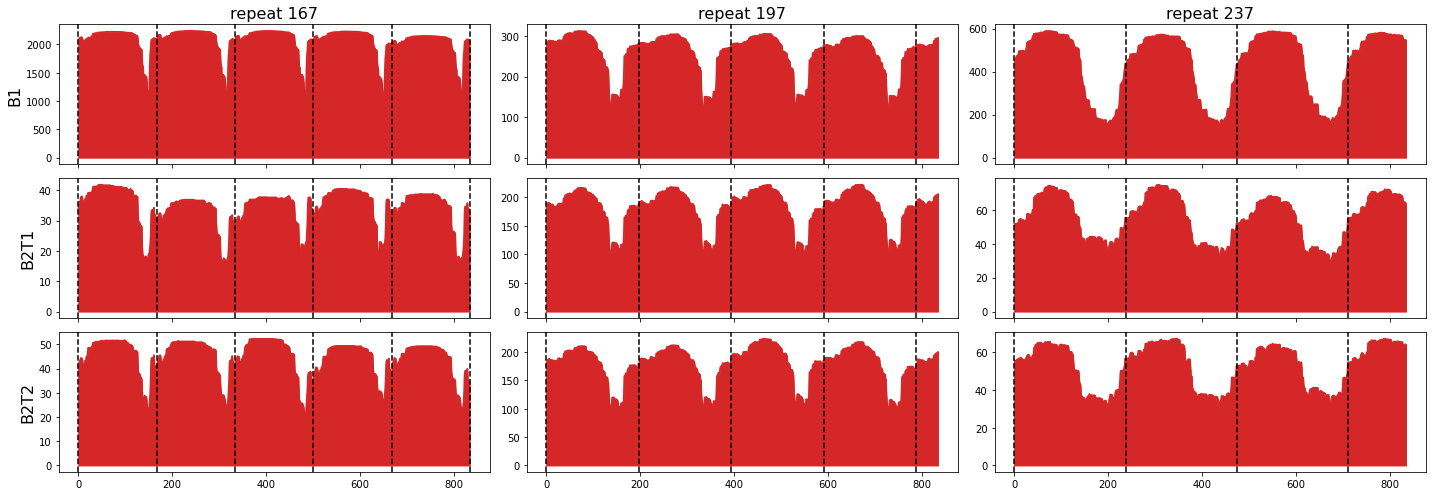

In [9]:
start = 4000
rstart = 4000
signals = np.array([[mnase2020_167_win3, mnase2020_197b_win3, mnase2020_237_2_win3],
                    [mnase2023_167_1_win3, mnase2023_197b_1_win3, mnase2023_237_1_win3],
                    [mnase2023_167_2_win3, mnase2023_197b_2_win3, mnase2023_237_2_win3]])
ylabels = ['B1', 'B2T1', 'B2T2']
repeats = ['167', '197b', '237']
fig, axes = plt.subplots(3, 3, figsize=(20, 7), facecolor='w', layout='tight', sharex='col')#, sharey='col')

for j in range(3):
    axes[0, j].set_title(f'repeat {repeats[j][:3]}', fontsize=16)
for i in range(3):
    axes[i, 0].set_ylabel(ylabels[i], fontsize=16)
    for j in range(3):
        ax = axes[i, j]
        signal = signals[i, j]
        rid = repeats[j]
        rlen = int(rid[:3])
        # stop = rstart + 7*rlen + (4000-start)
        # ax.plot(np.arange(start, stop), signal[f'{rid}_7_4kbrf'][start:stop], color=colors[3])
        # ax.fill_between(np.arange(start, stop), signal[f'{rid}_7_4kbrf'][start:stop], color=colors[3])
        # for reps in range(0, 8):
        #     ax.axvline(rstart + reps*rlen, color='k', linestyle='--')
        start = rstart + rlen
        stop = start + 5*167
        ax.plot(signal[f'{rid}_7_4kbrf'][start:stop], color=colors[3])
        ax.fill_between(np.arange(stop-start), signal[f'{rid}_7_4kbrf'][start:stop], color=colors[3])
        for reps in range(0, 6-j):
            ax.axvline(reps*rlen, color='k', linestyle='--')
plot_utils.save_fig_and_values(fig, '/home/alex/shared_folder/JB_seqdes/results/mnase_Syn_comparereps_140-170_noedges_sameX', format=['png', 'svg'])

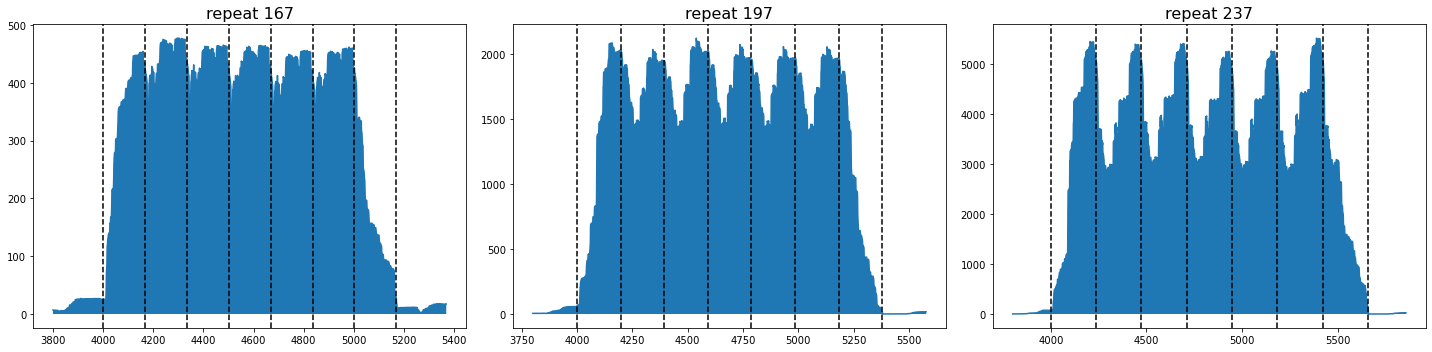

In [10]:
start = 3800
rstart = 4000
signals = np.array([mnase601_167_win3, mnase601_197_win3, mnase601_237_win3])
repeats = ['167', '197', '237']
fig, axes = plt.subplots(1, 3, figsize=(20, 5), facecolor='w', layout='tight', sharex='col', sharey='col')

for j in range(3):
    axes[j].set_title(f'repeat {repeats[j]}', fontsize=16)
    ax = axes[j]
    signal = signals[j]
    rid = repeats[j]
    rlen = int(rid[:3])
    stop = rstart + rlen * 7 + (4000-start)
    ax.plot(np.arange(start, stop), signal[f'{rid}_601_7_4kbrf'][start:stop])
    ax.fill_between(np.arange(start, stop), signal[f'{rid}_601_7_4kbrf'][start:stop])
    # ax.plot(np.arange(rstart, rstop), signal[f'{rid}_7_4kbrf'][rstart:rstop])
    # ax.fill_between(np.arange(rstart, rstop), signal[f'{rid}_7_4kbrf'][rstart:rstop], label='repeat', color=colors[1])
    for reps in range(0, 8):
        ax.axvline(rstart + reps*rlen, color='k', linestyle='--')

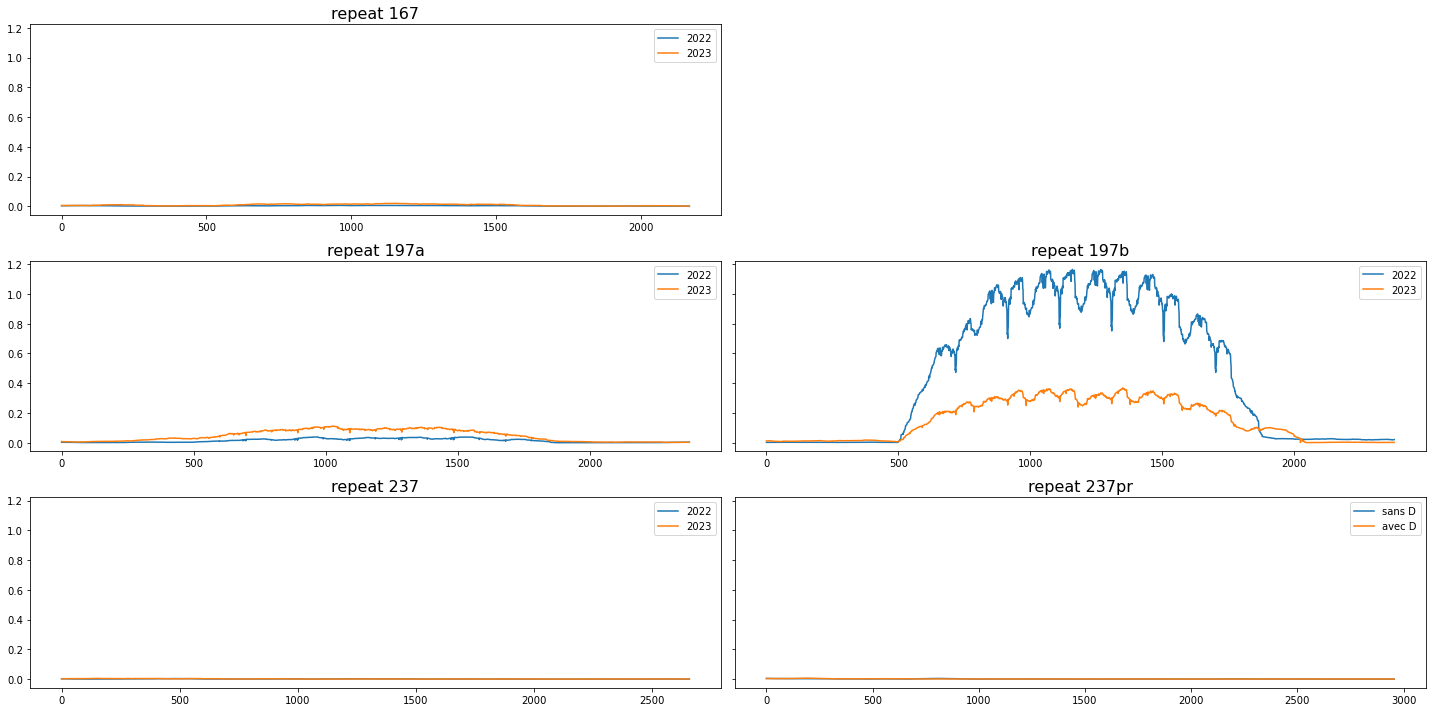

In [56]:
start = 3500
stop = -3500

fig, axes = plt.subplots(3, 2, figsize=(20, 10), facecolor='w', layout='tight', sharey=True)
col_idx = 0

axes[0, 0].set_title('repeat 167', fontsize=16)
axes[0, 0].plot(rna2022_167['167_7_4kbrf'][start:stop], label='2022')
axes[0, 0].plot(rna2023_167['167_7_4kbrf'][start:stop], label='2023')
axes[0, 0].legend()

axes[0, 1].set_axis_off()

axes[1, 0].set_title('repeat 197a', fontsize=16)
axes[1, 0].plot(rna2022_197a['197a_7_4kbrf'][start:stop], label='2022')
axes[1, 0].plot(rna2023_197a['197a_7_4kbrf'][start:stop], label='2023')
axes[1, 0].legend()

axes[1, 1].set_title('repeat 197b', fontsize=16)
axes[1, 1].plot(rna2022_197b['197b_7_4kbrf'][start:stop], label='2022')
axes[1, 1].plot(rna2023_197b['197b_7_4kbrf'][start:stop], label='2023')
axes[1, 1].legend()

axes[2, 0].set_title('repeat 237', fontsize=16)
axes[2, 0].plot(rna2022_237['237_7_4kbrf'][start:stop], label='2022')
axes[2, 0].plot(rna2023_237['237_7_4kbrf'][start:stop], label='2023')
axes[2, 0].legend()

axes[2, 1].set_title('repeat 237pr', fontsize=16)
axes[2, 1].plot(rna2022_237sansD['237pr_7_4kbrf'][start:stop], label='sans D')
axes[2, 1].plot(rna2022_237D['237pr_7_4kbrf'][start:stop], label='avec D')
axes[2, 1].legend()

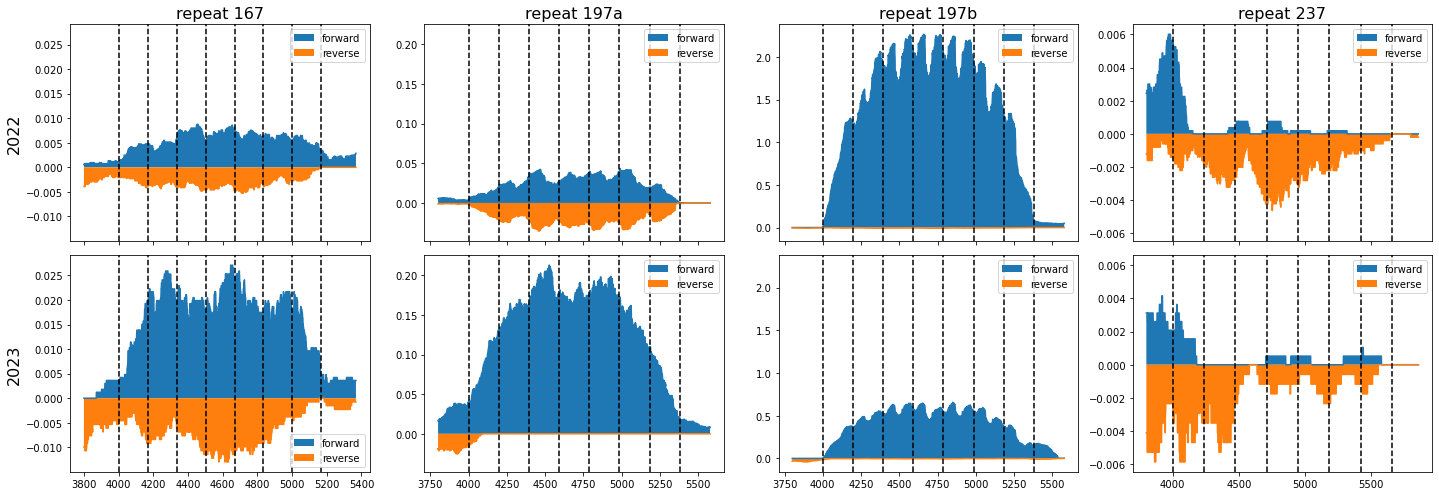

In [8]:
start = 3800
rstart = 4000
signals = np.array([[(rna2022_167_for, rna2022_167_rev), (rna2022_197a_for, rna2022_197a_rev), (rna2022_197b_for, rna2022_197b_rev), (rna2022_237_for, rna2022_237_rev)],
                    [(rna2023_167_for, rna2023_167_rev), (rna2023_197a_for, rna2023_197a_rev), (rna2023_197b_for, rna2023_197b_rev), (rna2023_237_for, rna2023_237_rev)]])
labels = ['2022', '2023']
repeats = ['167', '197a', '197b', '237']
fig, axes = plt.subplots(2, 4, figsize=(20, 7), facecolor='w', layout='tight', sharex='col', sharey='col')

for j in range(4):
    axes[0, j].set_title(f'repeat {repeats[j]}', fontsize=16)
for i in range(2):
    axes[i, 0].set_ylabel(labels[i], fontsize=16)
    for j in range(4):
        ax = axes[i, j]
        signal_for, signal_rev = signals[i, j]
        rid = repeats[j]
        rlen = int(rid[:3])
        stop = rstart + rlen * 7 + (4000-start)
        if signal_for is not None:
            ax.plot(np.arange(start, stop), signal_for[f'{rid}_7_4kbrf'][start:stop])
            ax.fill_between(np.arange(start, stop), signal_for[f'{rid}_7_4kbrf'][start:stop], label='forward')
            ax.plot(np.arange(start, stop), -signal_rev[f'{rid}_7_4kbrf'][start:stop])
            ax.fill_between(np.arange(start, stop), -signal_rev[f'{rid}_7_4kbrf'][start:stop], label='reverse')
            # ax.plot(np.arange(rstart, rstop), signal_for[f'{rid}_7_4kbrf'][rstart:rstop])
            # ax.fill_between(np.arange(rstart, rstop), signal_for[f'{rid}_7_4kbrf'][rstart:rstop], label='repeat', color=colors[1])
            for reps in range(0, 8):
                ax.axvline(rstart + reps*rlen, color='k', linestyle='--')
            ax.legend()
        else:
            ax.set_axis_off()

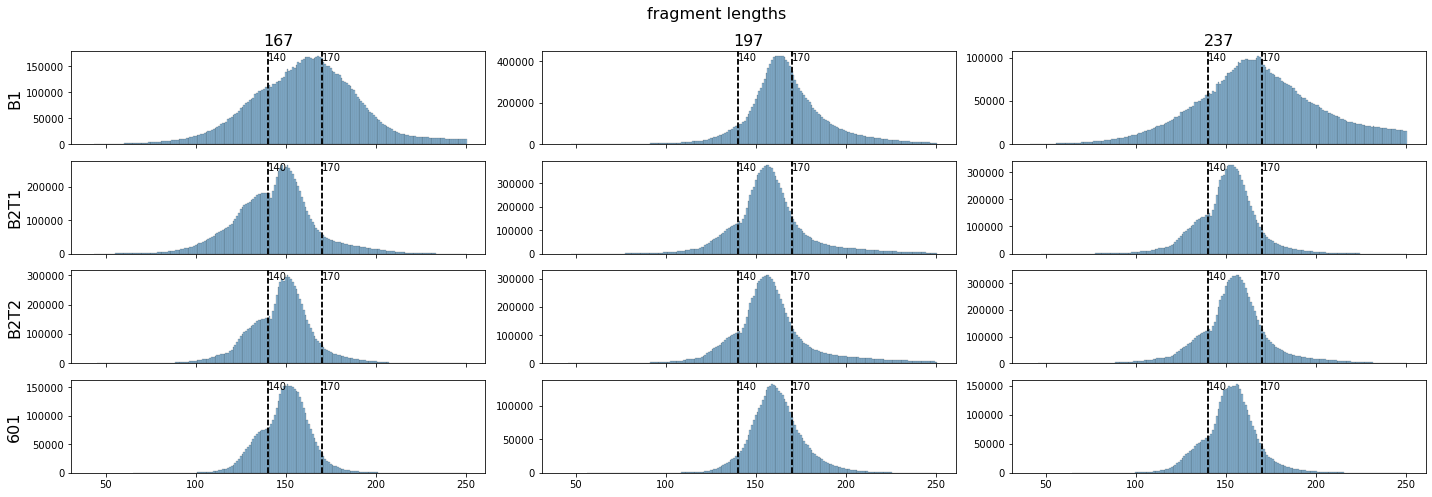

In [44]:
bam_files = [
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_167_1_lib406963_6879_2_trimfiltered_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_1972_1_lib402286_6844_1_trimfiltered_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_237_1_lib406964_6879_2_trimfiltered_max250.sorted.bam',

    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_167_4_1_lib713576_10294_1_trimfiltered_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_2_27_1_lib713580_10294_1_trimfiltered_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_237_44_1_lib713582_10294_1_trimfiltered_max250.sorted.bam',

    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_167_4_2_lib713577_10294_1_trimfiltered_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_2_27_2_lib713581_10294_1_trimfiltered_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_237_44_2_lib713583_10294_1_trimfiltered_max250.sorted.bam',

    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_601/SRR13645559_167_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_601/SRR13645549_197_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_601/SRR13645545_237_max250.sorted.bam',
    ]
titles = ['167', '197', '237']
ylabels = ['B1', 'B2T1', 'B2T2', '601']
fig, axes = plt.subplots(4, 3, figsize=(20, 7), facecolor='w', layout='tight', sharex=True)
fig.suptitle('fragment lengths', fontsize=16)
vlines = [140, 170]
for filename, ax in zip(bam_files, axes.flatten()):
    fraglens = pd.read_csv(f'{filename}.insert_sizes.txt', header=None)
    fraglens.columns = ['fragment_length']
    sns.histplot(fraglens, discrete=True, ax=ax, legend=False)
    ax.set_ylabel(None)
    for v in vlines:
        ax.axvline(x=v, color='k', linestyle='--')
        ax.axvline(x=v, color='k', linestyle='--')
        ax.annotate(str(v), xy=(v, 0.9), xycoords=('data', 'axes fraction'))
for j in range(3):
    axes[0, j].set_title(titles[j], fontsize=16)
for i in range(4):
    axes[i, 0].set_ylabel(ylabels[i], fontsize=16)
plot_utils.save_fig_and_values(fig, '/home/alex/shared_folder/JB_seqdes/results/fraglens_Synrepsand601_140-170', format=['png', 'svg'])

4930 /home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_167_1_lib406963_6879_2_trimfiltered_max250.sorted.bam
3981 /home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_1972_1_lib402286_6844_1_trimfiltered_max250.sorted.bam
2516 /home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_237_1_lib406964_6879_2_trimfiltered_max250.sorted.bam
94 /home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_167_4_1_lib713576_10294_1_trimfiltered_max250.sorted.bam
2507 /home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_2_27_1_lib713580_10294_1_trimfiltered_max250.sorted.bam
1094 /home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_237_44_1_lib713582_10294_1_trimfiltered_max250.sorted.bam
120 /home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_167_4_2_lib713577_10294_1_trimfiltered_max250.sorted.bam
2129 /home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_202

Text(0.5, 0.98, 'Mid points of fragments between 140 and 170bp')

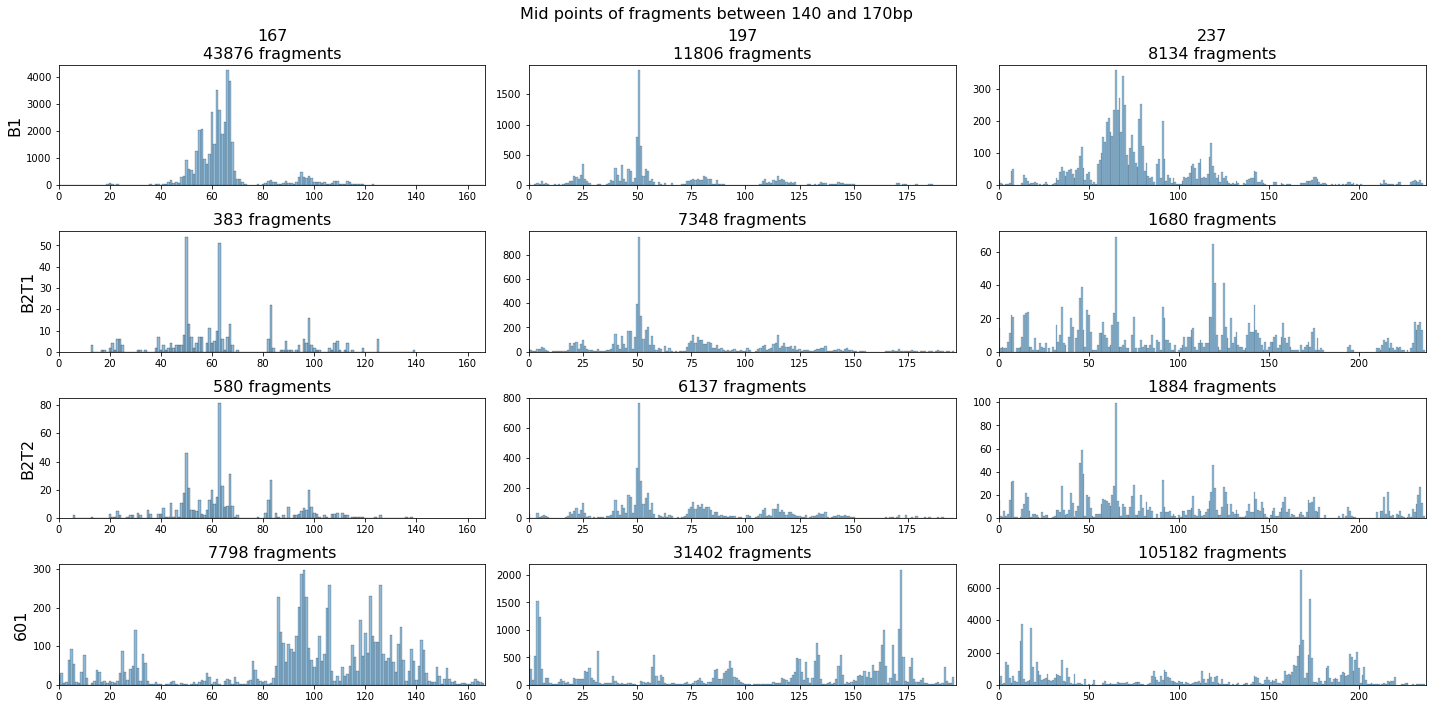

In [70]:
bam_files = [
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_167_1_lib406963_6879_2_trimfiltered_max250.sorted.bam',
    # '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_1971_1_lib402285_6844_1_trimfiltered_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_1972_1_lib402286_6844_1_trimfiltered_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_237_1_lib406964_6879_2_trimfiltered_max250.sorted.bam',
    # '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_237_1_lib406964_6888_1_trimfiltered_max250.sorted.bam',

    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_167_4_1_lib713576_10294_1_trimfiltered_max250.sorted.bam',
    # '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_1_22_1_lib713578_10294_1_trimfiltered_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_2_27_1_lib713580_10294_1_trimfiltered_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_237_44_1_lib713582_10294_1_trimfiltered_max250.sorted.bam',

    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_167_4_2_lib713577_10294_1_trimfiltered_max250.sorted.bam',
    # '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_1_22_2_lib713579_10294_1_trimfiltered_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_2_27_2_lib713581_10294_1_trimfiltered_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_237_44_2_lib713583_10294_1_trimfiltered_max250.sorted.bam',

    # '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237_1_lib554809_7856_3_trimfiltered_max250.sorted.bam',
    # '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237_2_lib554810_7856_3_trimfiltered_max250.sorted.bam',
    # '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D10_1_lib554811_7856_3_trimfiltered_max250.sorted.bam',
    # '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D10_2_lib554812_7856_3_trimfiltered_max250.sorted.bam',
    # '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D50_1_lib554813_7856_3_trimfiltered_max250.sorted.bam',
    # '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D50_2_lib554814_7856_3_trimfiltered_max250.sorted.bam',

    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_601/SRR13645559_167_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_601/SRR13645549_197_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_601/SRR13645545_237_max250.sorted.bam',
    ]
titles = ['167', '197', '237'] + [''] * 9
ylabels = ['B1', 'B2T1', 'B2T2', '601']
repids = ['167', '197b', '237'] * 3 + ['167_601', '197_601', '237_601']
minfragsize, maxfragsize = 140, 170
start = 4000
fig, axes = plt.subplots(4, 3, figsize=(20, 10), facecolor='w', layout='tight')
for bam_file, title, repid, ax in zip(bam_files, titles, repids, axes.flatten()):
    rlen = int(repid[:3])
    with pysam.AlignmentFile(bam_file, 'rb') as f:
        coords = []
        for read in f.fetch(contig=f'{repid}_7_4kbrf'):
            if (not read.is_reverse
                and read.is_proper_pair
                and read.template_length >= minfragsize
                and read.template_length <= maxfragsize
                and read.reference_start >= start
                and read.reference_start + read.template_length < start + 7*rlen):
                coords.append(read.reference_start + read.template_length // 2)
    coords = np.array(coords)
    rep_coords = (coords[(coords >= start+rlen) & (coords < start + 6*rlen)] - start) % rlen
    print(len(rep_coords[(rep_coords >= 90) | (rep_coords < 30)]), bam_file)
    sns.histplot(pd.DataFrame(rep_coords, columns=['mid points']), discrete=True, ax=ax, legend=False)
    ax.set_ylabel(None)
    if title != '':
        ax.set_title(f'{title}\n{len(rep_coords)} fragments', fontsize=16)
    else:
        ax.set_title(f'{len(rep_coords)} fragments', fontsize=16)
    ax.set_xlim(0, rlen)
for i in range(4):
    axes[i, 0].set_ylabel(ylabels[i], fontsize=16)
fig.suptitle(f'Mid points of fragments between {minfragsize} and {maxfragsize}bp', fontsize=16)
# plot_utils.save_fig_and_values(fig, '/home/alex/shared_folder/JB_seqdes/results/midpoints_Synrepsand601_140-170_noedges', format=['png'])

Text(0.5, 0.98, 'Midpoints of fragments between 140 and 170bp extended 73 bases each direction')

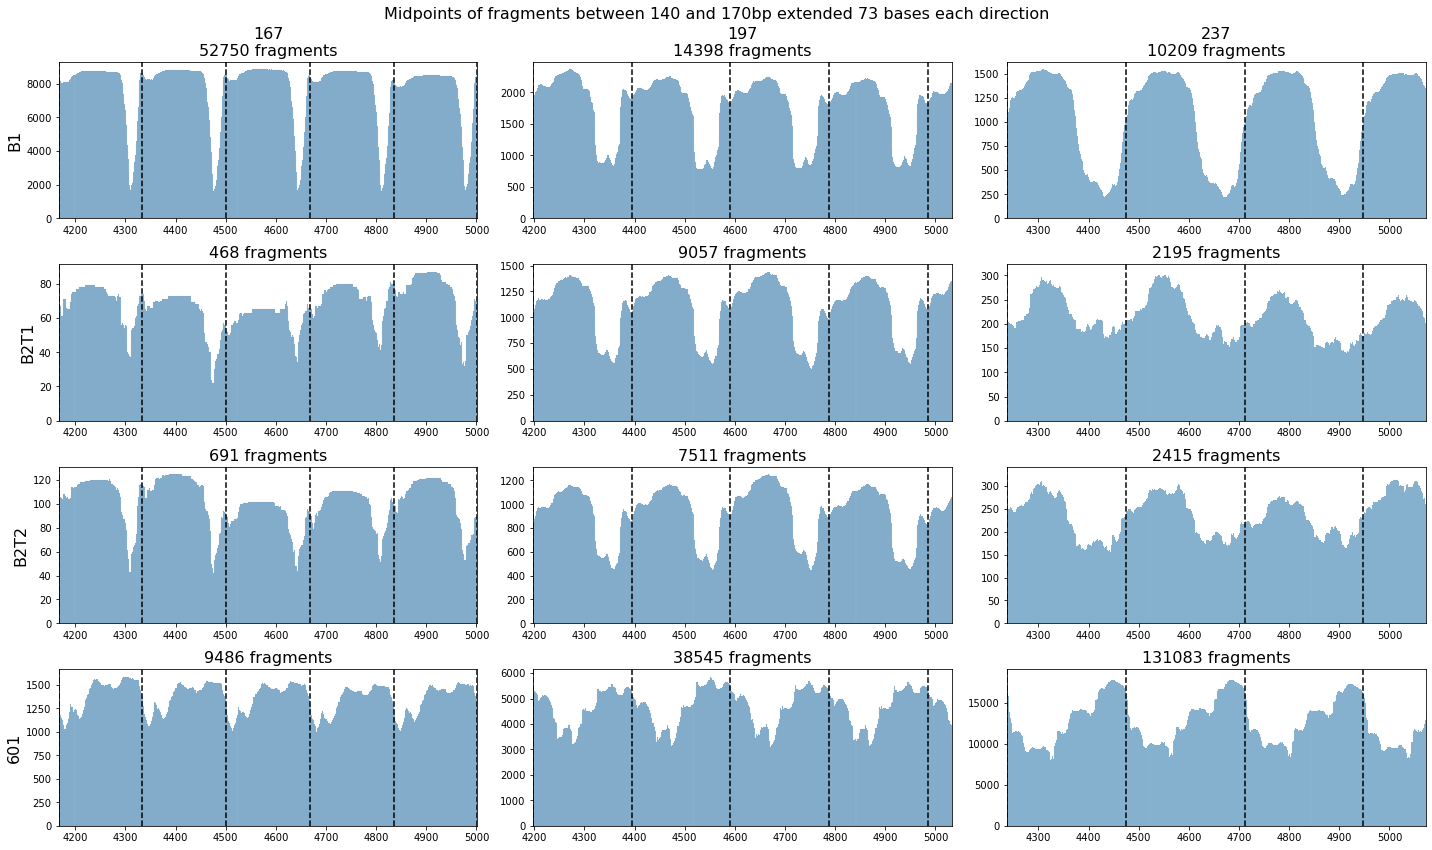

In [65]:
bam_files = [
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_167_1_lib406963_6879_2_trimfiltered_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_1972_1_lib402286_6844_1_trimfiltered_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_237_1_lib406964_6879_2_trimfiltered_max250.sorted.bam',

    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_167_4_1_lib713576_10294_1_trimfiltered_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_2_27_1_lib713580_10294_1_trimfiltered_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_237_44_1_lib713582_10294_1_trimfiltered_max250.sorted.bam',

    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_167_4_2_lib713577_10294_1_trimfiltered_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_2_27_2_lib713581_10294_1_trimfiltered_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_237_44_2_lib713583_10294_1_trimfiltered_max250.sorted.bam',

    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_601/SRR13645559_167_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_601/SRR13645549_197_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_601/SRR13645545_237_max250.sorted.bam',
    ]
titles = ['167', '197', '237'] + [''] * 9
ylabels = ['B1', 'B2T1', 'B2T2', '601']
repids = ['167', '197b', '237'] * 3 + ['167_601', '197_601', '237_601']
minfragsize, maxfragsize = 140, 170
ext_len = 73
start = 4000
fig, axes = plt.subplots(4, 3, figsize=(20, 12), facecolor='w', layout='tight')
for bam_file, title, repid, ax in zip(bam_files, titles, repids, axes.flatten()):
    rlen = int(repid[:3])
    with pysam.AlignmentFile(bam_file, 'rb') as f:
        coords = []
        for read in f.fetch(contig=f'{repid}_7_4kbrf'):
            if (not read.is_reverse
                and read.is_proper_pair
                and read.template_length >= minfragsize
                and read.template_length <= maxfragsize
                and read.reference_start >= start
                and read.reference_start + read.template_length < start + 7*rlen):
                coords.append(read.reference_start + read.template_length // 2)
    coords = np.array(coords)
    # rep_coords = (coords[(coords >= start+rlen) & (coords < start + 6*rlen)] - start) % rlen
    extended_coords = (coords.reshape(-1, 1) + np.arange(-ext_len, ext_len + 1).reshape(1, -1)).ravel()# % rlen

    sns.histplot(pd.DataFrame(extended_coords, columns=['mid points']), discrete=True, ax=ax, legend=False)
    ax.set_ylabel(None)
    if title != '':
        ax.set_title(f'{title}\n{len(coords)} fragments', fontsize=16)
    else:
        ax.set_title(f'{len(coords)} fragments', fontsize=16)
    for i in range(1, 7 - (rlen-167)//30):
        ax.axvline(start + i*rlen, color='k', linestyle='--')
    ax.set_xlim(start + rlen, start + rlen + 5*167)
for i in range(4):
    axes[i, 0].set_ylabel(ylabels[i], fontsize=16)
fig.suptitle(f'Midpoints of fragments between {minfragsize} and {maxfragsize}bp extended {ext_len} bases each direction', fontsize=16)

Text(0.5, 0.98, 'Mid points of fragments between 140 and 170bp')

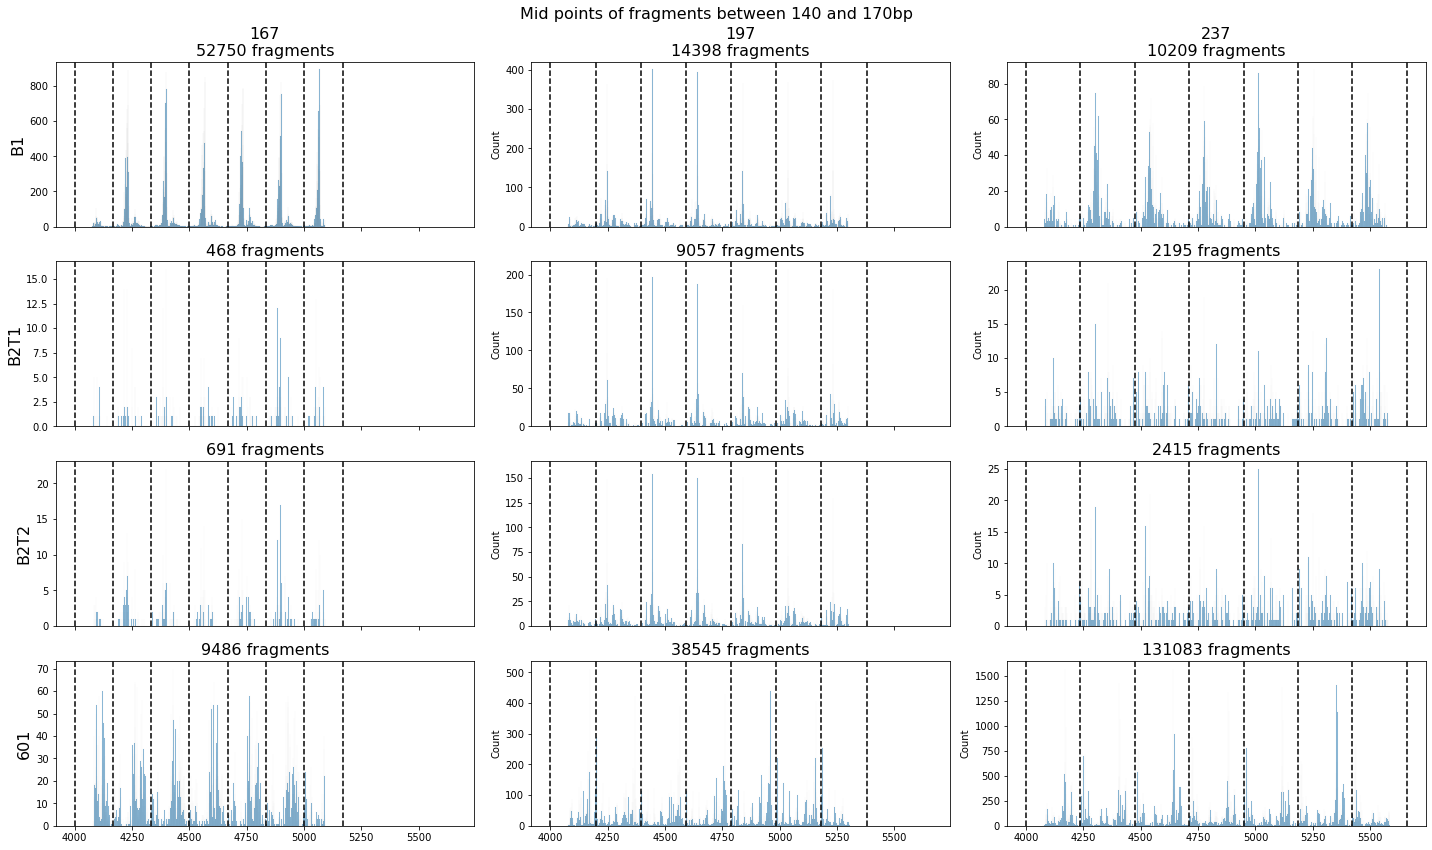

In [37]:
bam_files = [
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_167_1_lib406963_6879_2_trimfiltered_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_1972_1_lib402286_6844_1_trimfiltered_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_237_1_lib406964_6879_2_trimfiltered_max250.sorted.bam',

    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_167_4_1_lib713576_10294_1_trimfiltered_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_2_27_1_lib713580_10294_1_trimfiltered_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_237_44_1_lib713582_10294_1_trimfiltered_max250.sorted.bam',

    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_167_4_2_lib713577_10294_1_trimfiltered_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_2_27_2_lib713581_10294_1_trimfiltered_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_237_44_2_lib713583_10294_1_trimfiltered_max250.sorted.bam',

    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_601/SRR13645559_167_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_601/SRR13645549_197_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_601/SRR13645545_237_max250.sorted.bam',
    ]
titles = ['167', '197', '237'] + [''] * 9
ylabels = ['B1', 'B2T1', 'B2T2', '601']
repids = ['167', '197b', '237'] * 3 + ['167_601', '197_601', '237_601']
minfragsize, maxfragsize = 140, 170
start = 4000
fig, axes = plt.subplots(4, 3, figsize=(20, 12), facecolor='w', layout='tight', sharex=True)
for bam_file, title, repid, ax in zip(bam_files, titles, repids, axes.flatten()):
    rlen = int(repid[:3])
    with pysam.AlignmentFile(bam_file, 'rb') as f:
        coords = []
        for read in f.fetch(contig=f'{repid}_7_4kbrf'):
            if (not read.is_reverse
                and read.is_proper_pair
                and read.template_length >= minfragsize
                and read.template_length <= maxfragsize
                # and ((read.reference_start < start
                #       and read.reference_start + read.template_length >= start)
                #      or (read.reference_start < start + 7*rlen
                #          and read.reference_start + read.template_length >= start + 7*rlen))
                # and read.reference_start + read.template_length >= start
                # and read.reference_start < start + 7*rlen
                and read.reference_start >= start
                and read.reference_start + read.template_length < start + 7*rlen
                ):
                coords.append(read.reference_start + read.template_length // 2)
    coords = np.array(coords)
    # rep_coords = (coords[(coords >= start+rlen) & (coords < start + 6*rlen)] - start) % rlen

    sns.histplot(pd.DataFrame(coords, columns=['mid points']), discrete=True, ax=ax, legend=False)
    if title != '':
        ax.set_title(f'{title}\n{len(coords)} fragments', fontsize=16)
    else:
        ax.set_title(f'{len(coords)} fragments', fontsize=16)
    for i in range(8):
        ax.axvline(start + i*rlen, color='k', linestyle='--')
for i in range(4):
    axes[i, 0].set_ylabel(ylabels[i], fontsize=16)
fig.suptitle(f'Mid points of fragments between {minfragsize} and {maxfragsize}bp', fontsize=16)

Figure article

In [7]:
model_name = 'weights_with_rev_compl_rep2'
with np.load(f'/home/alex/shared_folder/JB_seqdes/results/preds_{model_name}_on_justrepeatsATGC.npz') as f:
    preds_syn = {k: f[k] for k in f.keys()}
with np.load(f'/home/alex/shared_folder/JB_seqdes/results/preds_{model_name}_on_justrepeats601ATGC.npz') as f:
    preds_601 = {k: f[k] for k in f.keys()}

In [8]:
def target(n_reps, replen, final_len=None):
    amp = 0.4
    background = 0.2
    nuclen = 147

    x_gauss = np.arange(1, nuclen)
    y_target_ = background + amp*np.exp(-((x_gauss-((nuclen-1)/2.))**2 / (2.*nuclen*nuclen/16.)))
    y_target_ = np.append(y_target_, np.repeat(y_target_[-1],(replen - (nuclen-1))))  # linkers at last value
    y_target = np.tile(y_target_, n_reps)
    if final_len is not None:
        y_target = y_target[:final_len]
    return y_target

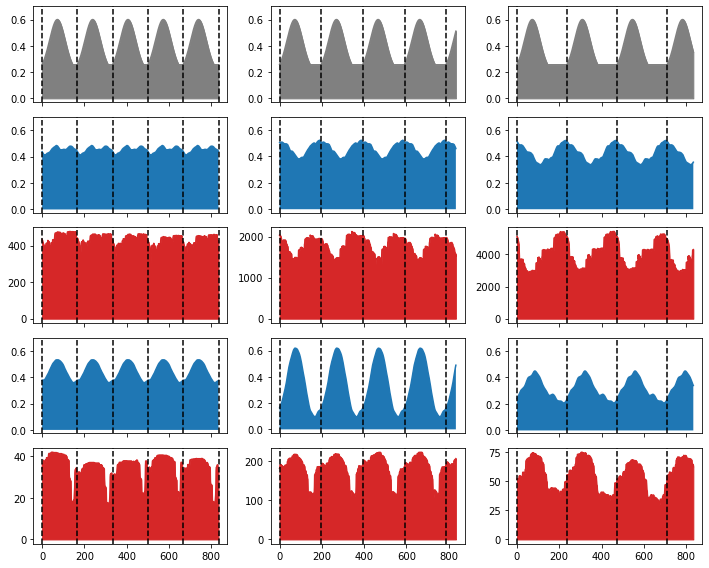

In [14]:
fig, axes = plt.subplots(5, 3, figsize=(10, 8), facecolor='w', layout='tight', sharex=True)

n_reps = 5
signals_601 = [mnase601_167_win3, mnase601_197_win3, mnase601_237_win3]
repeats_601 = ['167_601', '197_601', '237_601']
signals_syn = [mnase2023_167_1_win3, mnase2023_197b_1_win3, mnase2023_237_1_win3]
repeats_syn = ['167', '197b', '237']
ylabels = ['target', 'pred.', 'exp.', 'pred.', 'exp.']

for j in range(3):
    rid = repeats_601[j]
    rlen = int(rid[:3])
    # axes[0, j].set_title(f'repeat {rlen}', fontsize=24)

    # target
    targ = target(n_reps, rlen, 167*n_reps)
    axes[0, j].plot(targ, color='grey')
    axes[0, j].fill_between(np.arange(len(targ)), targ, color='grey')

    # 601 pred
    pred = preds_601[rid]
    start = 1000
    stop = start + n_reps*167
    values = utils.moving_average(pred[start-4:stop+3], 8)
    axes[1, j].plot(values)
    axes[1, j].fill_between(np.arange(stop-start), values)
    # 601 signal
    signal = signals_601[j]
    start = 4000 + rlen
    stop = start + n_reps*167
    values = signal[f'{rid}_7_4kbrf'][start:stop]
    axes[2, j].plot(values, color=colors[3])
    axes[2, j].fill_between(np.arange(stop-start), values, color=colors[3])
    
    # syn pred
    rid = repeats_syn[j]
    pred = preds_syn[rid]
    start = 1000
    stop = start + n_reps*167
    values = utils.moving_average(pred[start-4:stop+3], 8)
    axes[3, j].plot(values)
    axes[3, j].fill_between(np.arange(stop-start), values)
    # syn signal
    signal = signals_syn[j]
    start = 4000 + rlen
    stop = start + n_reps*167
    values = signal[f'{rid}_7_4kbrf'][start:stop]
    axes[4, j].plot(values, color=colors[3])
    axes[4, j].fill_between(np.arange(stop-start), values, color=colors[3])
    
    axes[0, j].set_ylim(top=0.7)
    axes[1, j].set_ylim(top=0.7)
    axes[3, j].set_ylim(top=0.7)

    # vlines and ylabels
    for i in range(5):
        for reps in range(0, 6-j):
            axes[i, j].axvline(reps*rlen, color='k', linestyle='--')
        # axes[i, 0].set_ylabel(ylabels[i], fontsize=22)
# plot_utils.save_fig_and_values(fig, '/home/alex/shared_folder/JB_seqdes/results/mnase_601vsSyn_targetvspredvsexp_140-170_noedges', format=['png', 'svg'])

In [63]:
bam_file = '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_237_44_1_lib713582_10294_1_trimfiltered_max250.sorted.bam'
with pysam.AlignmentFile(bam_file, 'rb') as f:
    mapqs = defaultdict(int)
    for read in f.fetch():
        mapqs[read.mapq] += 1
mapqs = dict(sorted(mapqs.items()))

<BarContainer object of 35 artists>

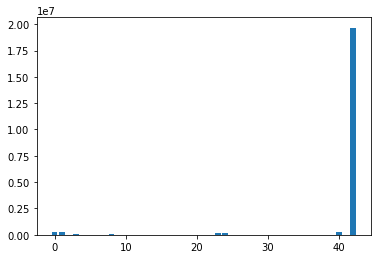

In [64]:
plt.bar(list(mapqs.keys()), list(mapqs.values()))

In [3]:
bam_file = '/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_08_2023/NG-34139_197_2_27_lib717031_10297_1_trimfiltered.sorted.bam'
repid = '197b'
with pysam.AlignmentFile(bam_file, 'rb') as f:
    with pysam.AlignmentFile(bam_file, 'rb') as f2:
        rlen = []
        mlen = []
        for read in f.fetch(contig=f'{repid}_7_4kbrf'):
            rlen.append(read.query_length)
            try:
                mate = f2.mate(read)
            except ValueError:
                mlen.append(-1)
            else:
                mlen.append(mate.query_length)
rlen = np.array(rlen)
mlen = np.array(mlen)

In [28]:
seqstr_197b = list(utils.read_fasta('/home/alex/shared_folder/JB_seqdes/Projet_Julien/197b_7_4kbrf.fa').values())[0]
seqstr_197b

'taaggaaacaagaataatatcaccttgtcccatccagactttctttcttaacttacctctaatatgggccattctcttattaccatcaaagcaactggcttcgactcttccattacccaacatcttggtgatttgagcatattcttggccttcttccttataaataagttcacgctttggaccgtcagagtcgttcttacctcttctaccttttttaccacctttagtgtttttcttacccatgatgaactttgctctatattacactagtgcttttgcaagtacaccttctacataagtaaaggtttctttcagcaaactaaaattgaagcttttttcaatttttcactattacttcttgcggcgaaaacaaaaatgaaaaaaaagtgaaaaatagcgttcgtgtataatgattattataagatctcattaacaatatgagaaataacccacattgttagttgaaacttgtttgtaatttatcgtgctgtatatacatatatacgtaaaaggaagatcgtacttttatatttataatcgctcgtaaaaactataactgaagaataagaaagagaacattttgaaagtacaggagggaaaatgatcgcttaggcggctgtcaagtcatgaaggatggtaaaaagttcattgacaccattgatatgttccttggcataagtggatcttgagctaccgtaaagaatggtgtaaccaaattttagattgttcttttcaacctcttgcttcactaatttaaataatggttcaataataggtgatgtcgaaccggaaacgcaaacgaaatctacctggttttggaaatgcttcttattattaccgacggacatcgaagaggatgttcttgatagagatattctgctattgtcagtaggactgacgccactgttgtaaaatttcatcaaaaactcagcggcggctaaggctagccccgtttgttgaacgaagacaatatccttatgcacataagcgtgaatatcc

In [29]:
one_hot_197b = utils.one_hot_encode(seqstr_197b)
one_hot_197b

array([[False, False, False,  True],
       [ True, False, False, False],
       [ True, False, False, False],
       ...,
       [False, False,  True, False],
       [False,  True, False, False],
       [ True, False, False, False]])

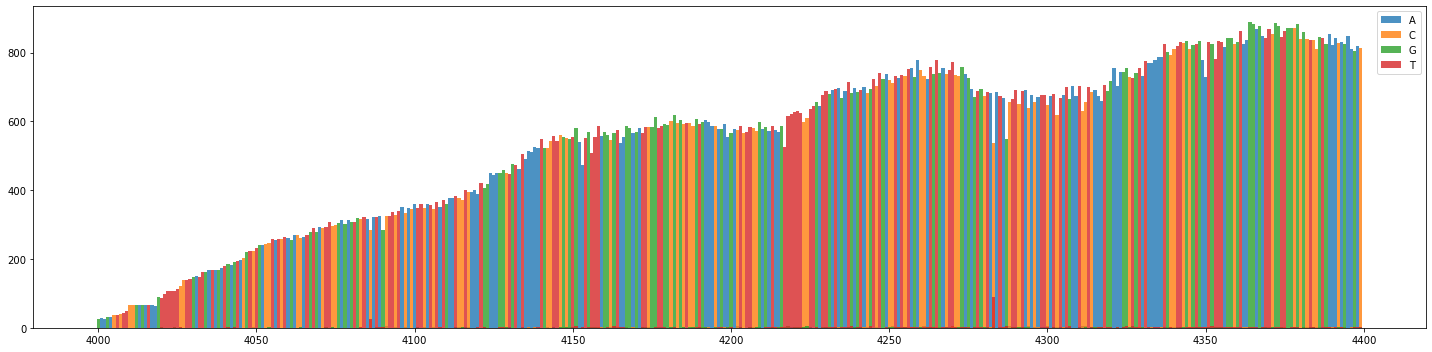

In [30]:
bam_file = '/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_08_2023/NG-34139_197_2_27_lib717031_10297_1_trimfiltered.sorted.bam'
repid = '197b'
with pysam.AlignmentFile(bam_file, 'rb') as f:
    res = f.count_coverage(contig=f'{repid}_7_4kbrf', start=0000, stop=9378)
fig, ax = plt.subplots(1, 1, figsize=(20, 5), facecolor='w', layout='tight')
start = 4000
stop = 4400
for arr, lab in zip(res, 'ACGT'):
    ax.bar(np.arange(start, stop), np.array(arr)[start:stop], label=lab, width=1, alpha=0.8)
ax.legend()
    # i = 0
    # for read in f.pileup(contig=f'{repid}_7_4kbrf', start=0, stop=9378):
    #     print(read)
    #     i += 1
    #     if i >= 15:
    #         break

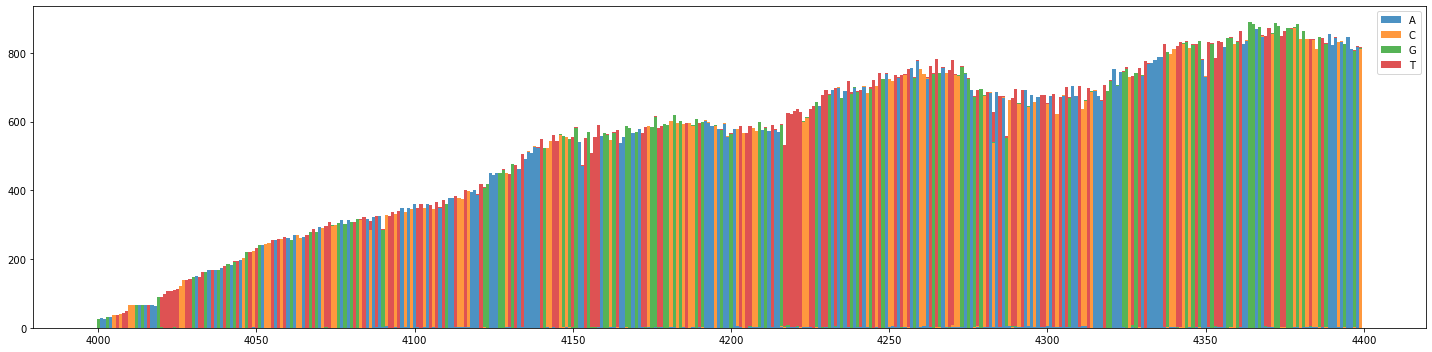

In [40]:
base_counts = np.array([arr for arr in res])
fig, ax = plt.subplots(1, 1, figsize=(20, 5), facecolor='w', layout='tight')
start = 4000
stop = 4400
for i, lab in enumerate('ACGT'):
    if i == 0:
        bottom = 0
    else:
        bottom += base_counts[i-1, start:stop]
    ax.bar(np.arange(start, stop), base_counts[i, start:stop], bottom=bottom, label=lab, width=1, alpha=0.8)
ax.legend()

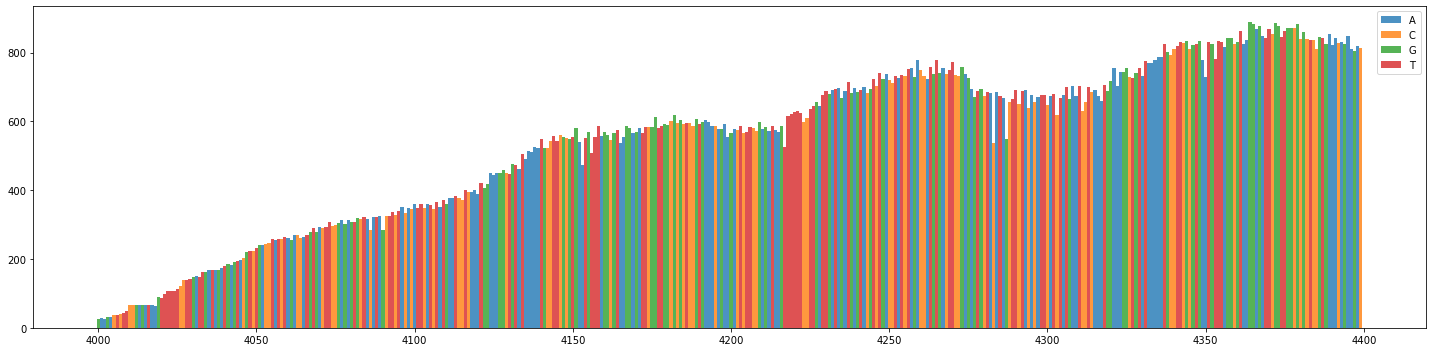

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(20, 5), facecolor='w', layout='tight')
start = 4000
stop = 4400
for i, (arr, lab) in enumerate(zip(res, 'ACGT')):
    ax.bar(np.arange(start, stop), np.array(arr)[start:stop]*one_hot_197b[start:stop, i], label=lab, width=1, alpha=0.8)
ax.legend()

In [38]:
diff_size = (rlen != mlen) & (mlen != -1)
print(len(rlen), np.sum(rlen != mlen), np.sum(diff_size), np.sum(mlen == -1))
# rlen[rlen != mlen] - mlen[rlen != mlen]

9618 5178 4886 292


In [45]:
print(np.sum(rlen != 151))
print(np.sum((rlen != 151) & (mlen != 151) & (mlen != -1)))
print(np.sum((rlen != 151) & (mlen != 151) & (mlen != -1) & (rlen != mlen)))

4190
1944
655


(0.0, 100.0)

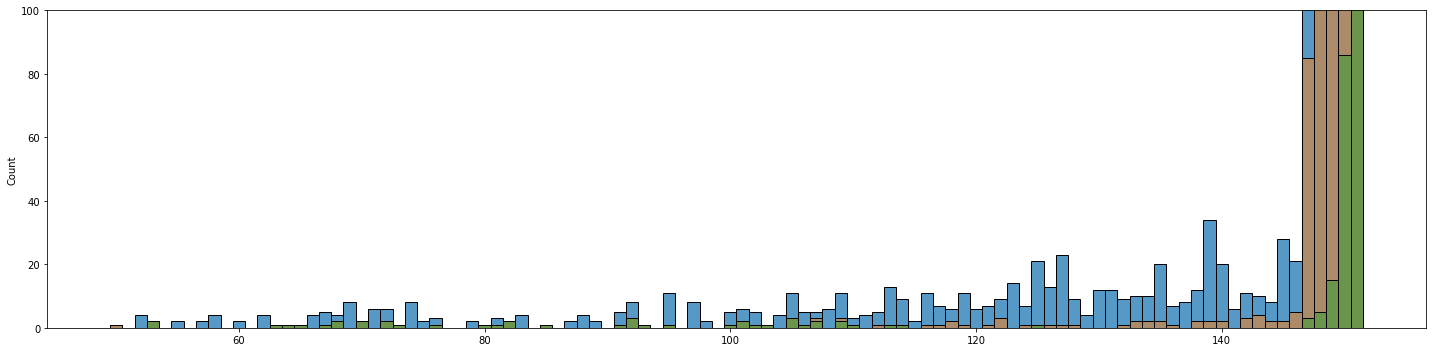

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(20, 5), facecolor='w', layout='tight')
sns.histplot(rlen, discrete=True, ax=ax)
sns.histplot(rlen[rlen != mlen], discrete=True, ax=ax, color=colors[1], alpha=0.5)
sns.histplot(rlen[mlen == -1], discrete=True, ax=ax, color=colors[2], alpha=0.5)
ax.set_ylim(top=100)

In [40]:
bam_file = '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_167_4_2_lib713577_10294_1_101bp_max250.sorted.bam'
with pysam.AlignmentFile(bam_file, 'rb') as f:
    tlens = []
    for read in f.fetch():
        if read.is_read1:
            if read.is_proper_pair:
                tlens.append(abs(read.template_length))
            else:
                tlens.append(0)
print(np.sum(np.array(tlens) == 0) / len(tlens))
print(np.sum(np.array(tlens) > 0) / len(tlens))

0.06997845465855339
0.9300215453414467


In [239]:
from deeptools.getFragmentAndReadSize import get_read_and_fragment_length
print(get_read_and_fragment_length(bam_file, numberOfProcessors=1))

({'sample_size': 5237, 'min': 0.0, 'qtile25': 0.0, 'mean': 55.09948443765514, 'median': 0.0, 'qtile75': 138.0, 'max': 250.0, 'std': 71.59975524428974, 'mad': 0.0, 'qtile10': 0.0, 'qtile20': 0.0, 'qtile30': 0.0, 'qtile40': 0.0, 'qtile60': 0.0, 'qtile70': 129.0, 'qtile80': 145.0, 'qtile90': 154.0, 'qtile99': 191.0}, {'sample_size': 5237, 'min': 50.0, 'qtile25': 50.0, 'mean': 50.0, 'median': 50.0, 'qtile75': 50.0, 'max': 50.0, 'std': 0.0, 'mad': 0.0, 'qtile10': 50.0, 'qtile20': 50.0, 'qtile30': 50.0, 'qtile40': 50.0, 'qtile60': 50.0, 'qtile70': 50.0, 'qtile80': 50.0, 'qtile90': 50.0, 'qtile99': 50.0})


In [72]:
bam_file = '/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29104_197_2_lib556539_7886_1_trimfiltered.sorted.bam'
# bam_file = '/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_08_2023/NG-34139_197_2_27_lib717031_10297_1_trimfiltered.sorted.bam'
repid = '197b'
with pysam.AlignmentFile(bam_file, 'rb') as f:
    proper_pairs = []
    n_proper2 = 0
    n_proper1 = 0
    for read in f.fetch(contig=f'{repid}_7_4kbrf', start=0000, stop=9378):
        if read.is_proper_pair and read.is_read1:
            read2 = f.mate(read)
            assert read2.is_proper_pair
            if read.is_reverse:
                read, read2 = read2, read
            proper_pairs.append((read.reference_start, read.query_alignment_length, read2.query_alignment_length, read.template_length))
            n_proper1 += 1
            if n_proper1 % 1000 == 0:
                print(n_proper1)
            pos, r1, r2, tlen = read.reference_start, read.query_alignment_length, read2.query_alignment_length, read.template_length
            if r1 != r2 and abs(tlen) % 197 == min(r1, r2):
                print(f'{read}\n{read2}\n')
        elif read.is_proper_pair and read.is_read2:
            n_proper2 += 1
print(n_proper1, n_proper2)
# proper_pairs = sorted(proper_pairs)
# print(len(proper_pairs), n_proper2)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000


KeyboardInterrupt: 

In [62]:
# 4000 + 7*197 == 5379
n_in_rep = 0
n_on_rep = 0
n_else = 0
n_both_truncated = 0
n_same_size = 0
n_smaller151 = 0
cpt = 0
n_small_left = 0
n_multiples = defaultdict(int)
n_near_multiples = defaultdict(int)
n_near2_multiples = defaultdict(int)
n_multiples_min = defaultdict(int)
n_near_multiples_min = defaultdict(int)
for pos, r1, r2, tlen in proper_pairs:
    # if (pos >= 4000
    #     and pos + abs(tlen) <= 4000 + 197*7
    #     and r1 < 150
    #     and r2 < 150):
    #     print(pos, r1, r2, tlen)
    #     cpt += 1
    if (pos >= 4000
        and pos + abs(tlen) <= 4000 + 197*7):
        n_in_rep += 1
        if r1 < 151 and r2 < 151:
            print(pos, r1, r2, tlen, abs(tlen) % 197, end=" ")
            if r1 == r2:
                if abs(tlen) == r1:
                    print("same", end="")
                    # if r1 <= 106:
                    n_multiples[0] += 1
                elif abs(tlen) % 197 == r1:
                    multiple = abs(tlen) // 197
                    print(f"multiple {multiple}", end="")
                    # if r1 <= 106:
                    n_multiples[multiple] += 1
                elif abs(abs(tlen) % 197 - r1) == 1:
                    near_multiple = round((abs(tlen) - r1) / 197)
                    print(f"near_multiple {near_multiple}", end="")
                    # if r1 <= 106:
                    n_near_multiples[near_multiple] += 1
                elif abs(abs(tlen) % 197 - r1) == 2:
                    near2_multiple = round((abs(tlen) - r1) / 197)
                    print(f"near2_multiple {near2_multiple}", end="")
                    # if r1 <= 106:
                    n_near2_multiples[near2_multiple] += 1
                n_same_size += 1
            print("")
            n_both_truncated += 1
        elif abs(tlen) < 151:
            cpt += 1
        if abs(tlen) < 151:
            n_smaller151 += 1
        # if r1 != r2:
            # print(pos, r1, r2, tlen, abs(tlen) % 197, end=" ")
        if abs(tlen) % 197 == min(r1, r2):
            multiple_min = abs(tlen) // 197
            # print(f"min_multiple {multiple_min}", end="")
            n_multiples_min[multiple_min] += 1
        elif abs(abs(tlen) % 197 - min(r1, r2)) == 1:
            near_multiple_min = round((abs(tlen) - min(r1, r2)) / 197)
            # print(f"near_min_multiple {near_multiple_min}", end="")
            n_near_multiples_min[near_multiple_min] += 1
            # print("")
        elif abs(tlen) < 151:
            n_small_left += 1
    elif (pos + abs(tlen) >= 4000
        and pos <= 4000 + 197*7):
        n_on_rep += 1
    else:
        n_else += 1
print(f'Pairs: {n_in_rep} inside repeats, {n_on_rep} partly on repeats, {n_else} outside of repeats')
print('On repeats,', n_smaller151, 'template smaller than 151bp')
print('On repeats,', cpt, 'template smaller than 151bp but at least one read longer than 151bp')
print('On repeats,', n_both_truncated, 'pairs both smaller than 151bp')
print('Among these', n_same_size, 'paired reads of same length')
print('Among these', n_multiples, 'templates of length read_length+n*197 (repeat length)')
print('And', n_near_multiples, 'templates of length read_length+n*197 +-1')
print('And', n_near2_multiples, 'templates of length read_length+n*197 +-2')
print('Overall', n_multiples_min, 'templates of length min_read_length+n*197')
print('And', n_near_multiples_min, 'templates of length min_read_length+n*197 +- 1')
print('And', n_small_left, 'templates smaller of equal to 151bp left')

4002 150 150 383 186 
4004 149 150 322 125 
4009 150 150 398 4 
4016 150 150 496 102 
4019 60 60 257 60 multiple 1
4019 149 150 322 125 
4019 150 149 175 175 
4019 150 149 338 141 
4019 150 150 265 68 
4019 150 150 281 84 
4019 150 150 319 122 
4019 150 150 438 44 
4021 148 150 316 119 
4021 148 150 468 74 
4022 147 148 374 177 
4022 147 150 346 149 
4022 147 150 358 161 
4022 147 150 427 33 
4027 133 133 330 133 multiple 1
4032 97 97 295 98 near_multiple 1
4033 130 130 -130 130 same
4041 150 150 339 142 
4043 150 150 217 20 
4043 150 150 229 32 
4043 150 150 230 33 
4043 150 150 262 65 
4043 150 150 314 117 
4043 150 150 421 27 
4043 150 150 426 32 
4046 150 148 408 14 
4047 149 148 397 3 
4047 149 150 326 129 
4047 149 150 333 136 
4047 149 150 360 163 
4049 149 149 349 152 
4049 150 150 210 13 
4053 148 148 -148 148 same
4058 130 130 -133 133 
4061 148 148 -148 148 same
4066 149 149 340 143 
4073 126 126 323 126 multiple 1
4075 150 150 323 126 
4082 150 150 321 124 
4082 150 150 495